/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------------------------------
Star Migration



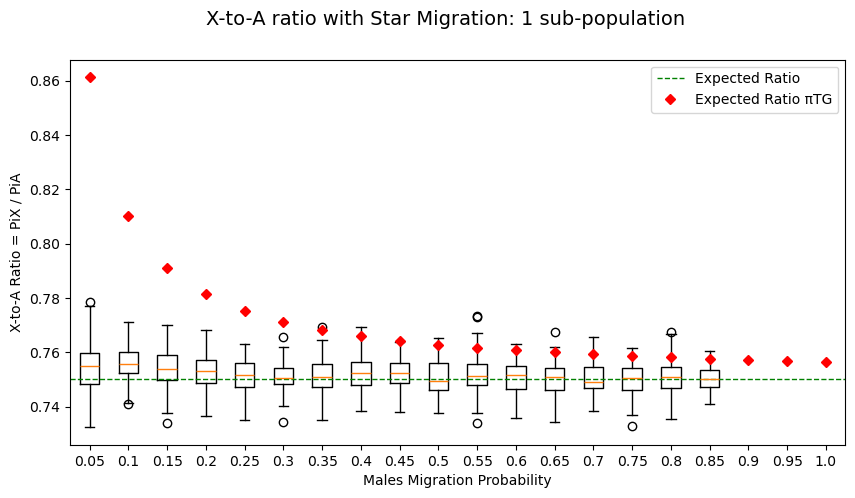

------------------------------------------------------------------------------------------------------------
Circle Migration



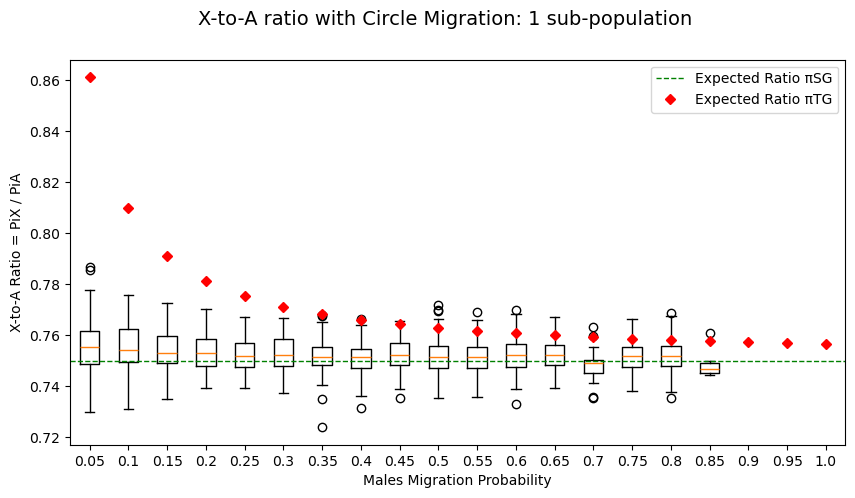

------------------------------------------------------------------------------------------------------------
StepStone Migration



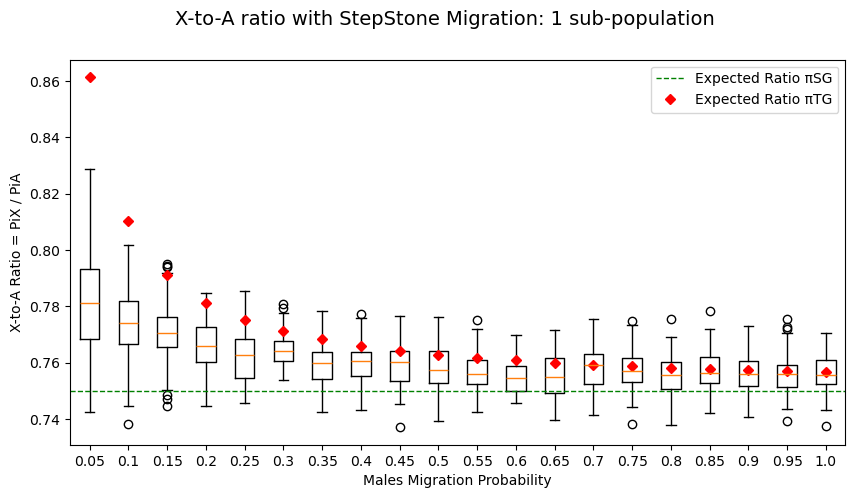

In [1]:
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Migrations/NWFV_MigV2_subpop/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
LRatio_stepstone = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)

n = 15
NeA = 50
NeX = 3/4 * NeA
mu = 40*1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    StepStone = []
    for NUM in range(1,101):
        File = FOLDER+"NWF_subpop_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 45:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                Star.append(np.mean(PiX)/np.mean(PiA))
            Text.close()
            
        File = FOLDER+"NWF_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 45:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                Circle.append(np.mean(PiX)/np.mean(PiA))
            Text.close()

        File = FOLDER+"NWF_subpop_stepstone_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 45:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                StepStone.append(np.mean(PiX)/np.mean(PiA))
            Text.close()
    
    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    LRatio_stepstone[counter] = StepStone
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    StepStone_median = np.median(StepStone)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of Star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)
    #print()
    #print("Number of StepStone simulations: ",len(StepStone))
    #print("Median Ratio: ",StepStone_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Star Migration: 1 sub-population", fontsize=14)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Circle Migration: 1 sub-population", fontsize=14)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio πSG')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D', color='red',linestyle='None', markersize=5, label='Expected Ratio πTG')
ax.legend() 

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("StepStone Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with StepStone Migration: 1 sub-population", fontsize=14)

ax.boxplot(LRatio_stepstone,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio πSG')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend() 

#fig.savefig(FOLDER_output+'NWFV_MigV2_circle.png') 
mp.show()

/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------------------------------
Star Migration



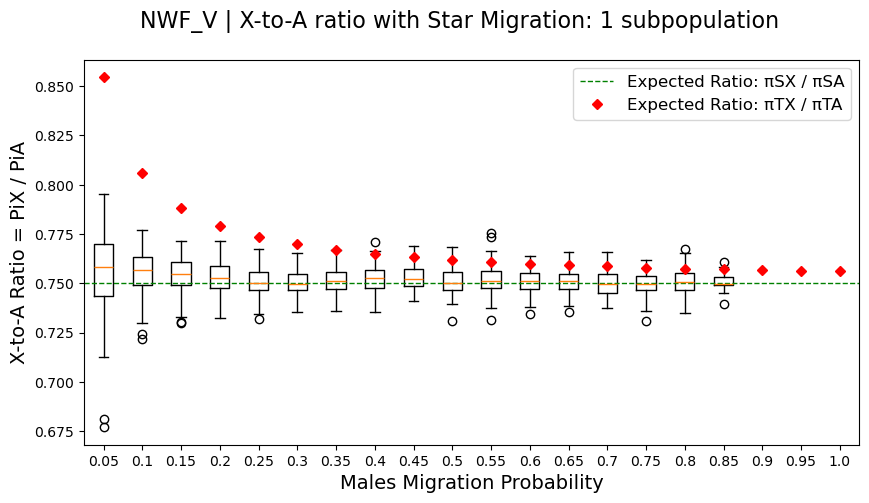

------------------------------------------------------------------------------------------------------------
Circle Migration



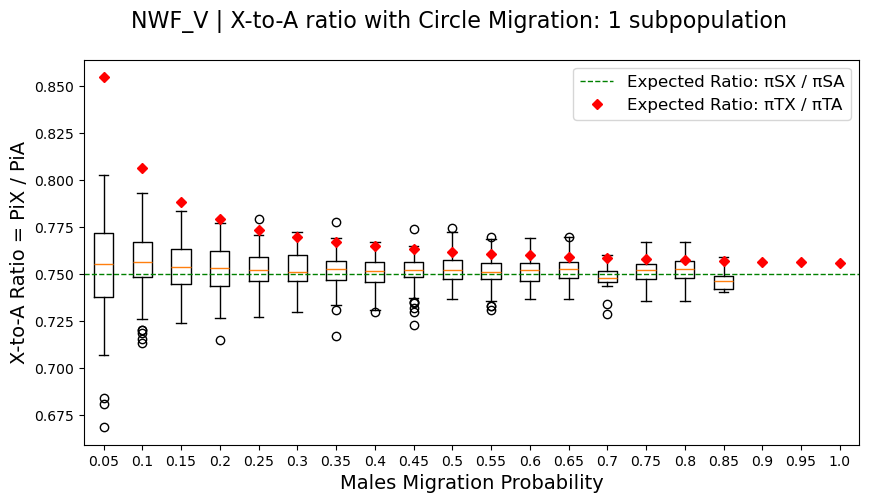

------------------------------------------------------------------------------------------------------------
StepStone Migration



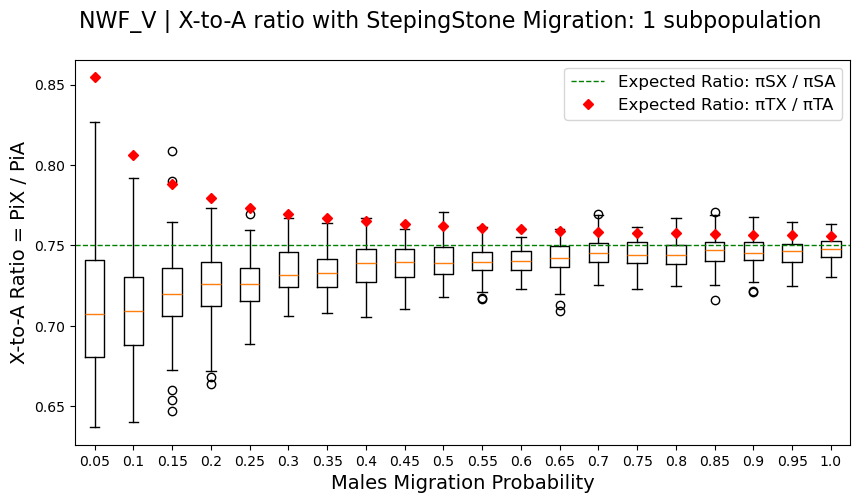

In [2]:
# Only for the subpopulation 1
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Migrations/NWFV_MigV2_subpop/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_Vanilla/Migrations/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LP1_star = [0 for k in range (len(Prob_Mig))]
LP1_circle = [0 for k in range (len(Prob_Mig))]
LP1_stepstone = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)

n = 10
NeA = 50
NeX = 3/4 * NeA
mu = 1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    StepStone = []
    for NUM in range(1,101):
        File = FOLDER+"NWF_subpop_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 30:    
                Star.append(float(Values[4])/float(Values[3]))
            Text.close()
            
        File = FOLDER+"NWF_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 30:
                Circle.append(float(Values[4])/float(Values[3]))
            Text.close()

        File = FOLDER+"NWF_subpop_stepstone_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 30:
                StepStone.append(float(Values[4])/float(Values[3]))
            Text.close()
    
    LP1_star[counter] = Star
    LP1_circle[counter] = Circle
    LP1_stepstone[counter] = StepStone
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of Star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)
    #print()
    #print("Number of StepStone simulations: ",len(StepStone))
    #print("Median Ratio: ",StepStone_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_V | X-to-A ratio with Star Migration: 1 subpopulation", fontsize=16)

ax.boxplot(LP1_star,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio: πTX / πTA')
ax.legend(fontsize=12)

fig.savefig(FOLDER_output+'NWFV_MigV2_star_1P.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_V | X-to-A ratio with Circle Migration: 1 subpopulation", fontsize=16)

ax.boxplot(LP1_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio: πTX / πTA')
ax.legend(fontsize=12) 

fig.savefig(FOLDER_output+'NWFV_MigV2_circle_1P.png') 
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("StepStone Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_V | X-to-A ratio with StepingStone Migration: 1 subpopulation", fontsize=16)

ax.boxplot(LP1_stepstone,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio: πTX / πTA')
ax.legend(fontsize=12) 

fig.savefig(FOLDER_output+'NWFV_MigV2_stepstone_1P.png') 
mp.show()

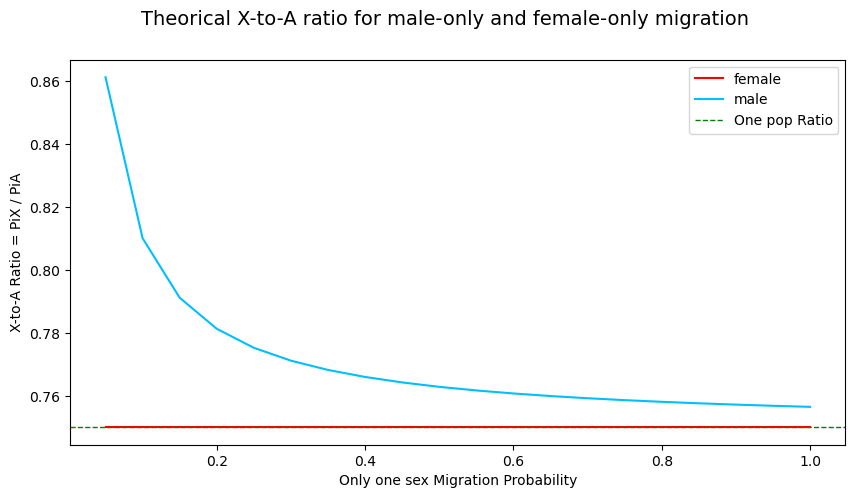

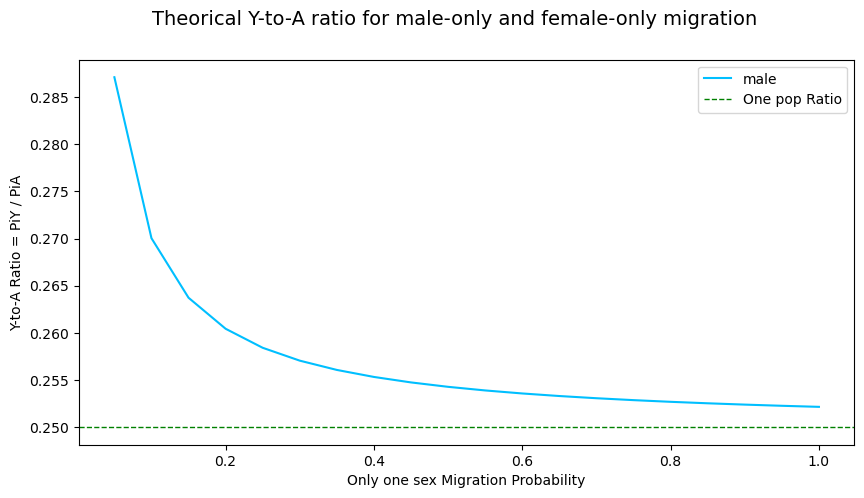

In [3]:
import matplotlib.pyplot as mp
import numpy as np
import os 

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
expected_ratio_X = 0.75
expected_ratio_Y = 0.25
n = 15
NeA = 50
NeX = 3/4 * NeA
NeY = 1/4 * NeA
mu = 40*1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
Pi_SY = 4*n*NeY*mu
LM_PiTX_PiTA = []
LF_PiTX_PiTA = []
LM_PiTY_PiTA = []
LF_PiTY_PiTA = []
# For male migration only 
for pmig in Prob_Mig:
    mA = 0 + 1/2 * (0+pmig)
    mX = 0 + 1/3 * (pmig+2*0)
    mY = 0 + pmig
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    Pi_TY = Pi_SY*(1+((n-1)**2)/(4*mY*NeY*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    PiTY_PiTA = Pi_TY / Pi_TA
    LM_PiTX_PiTA.append(PiTX_PiTA)
    LM_PiTY_PiTA.append(PiTY_PiTA)
    
# For female migration only
for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (0+2*pmig)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    PiTY_PiTA = Pi_TY / Pi_TA
    LF_PiTX_PiTA.append(PiTX_PiTA)


#X-to-A ratio 
fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("Theorical X-to-A ratio for male-only and female-only migration", fontsize=14)

ax.plot(Prob_Mig,LF_PiTX_PiTA, color = 'red',label='female')
ax.plot(Prob_Mig,LM_PiTX_PiTA, color = 'deepskyblue',label='male')
ax.set_xlabel("Only one sex Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio_X, color='green', linestyle='--',linewidth=1, label='One pop Ratio')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()

#X-to-A ratio 
fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("Theorical Y-to-A ratio for male-only and female-only migration", fontsize=14)

#ax.plot(Prob_Mig,LF_PiTY_PiTA, color = 'red',label='female')
ax.plot(Prob_Mig,LM_PiTY_PiTA, color = 'deepskyblue',label='male')
ax.set_xlabel("Only one sex Migration Probability")
ax.set_ylabel("Y-to-A Ratio = PiY / PiA")
ax.axhline(y=expected_ratio_Y, color='green', linestyle='--',linewidth=1, label='One pop Ratio')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()



------------------------------------------------------------------------------------------------------------
Star Migration



/tmp/ipykernel_4125713/274837560.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


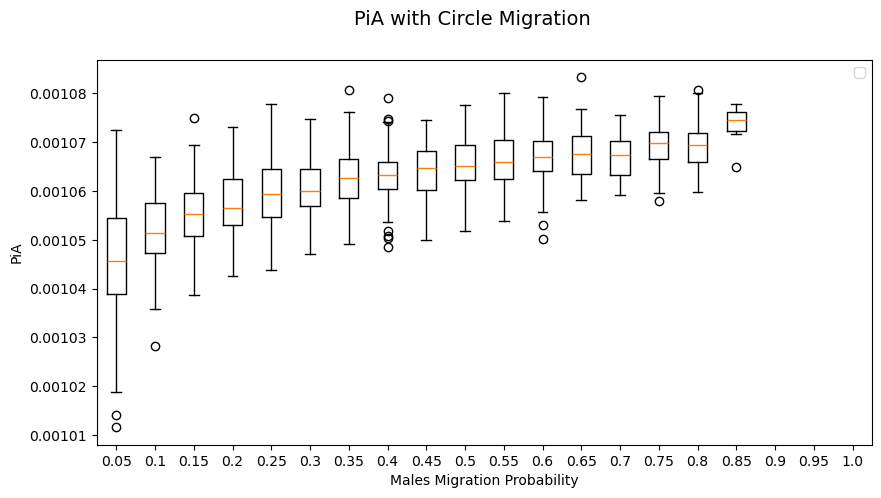

------------------------------------------------------------------------------------------------------------
Circle Migration



/tmp/ipykernel_4125713/274837560.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


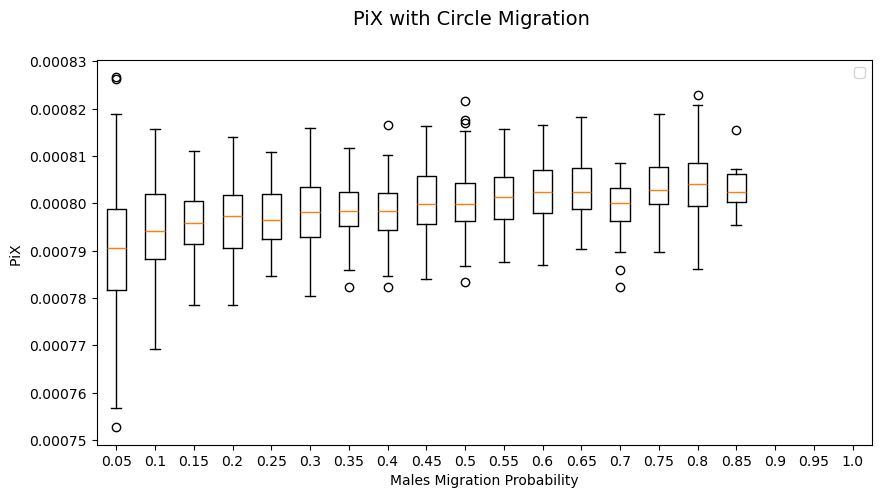

In [4]:
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Migrations/NWFV_MigV2_subpop/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LA_circle = [0 for k in range (len(Prob_Mig))]
LX_circle = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)

n = 105
NeA = 50
NeX = 3/4 * NeA
mu = 40*1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)

    X_Circle =[]
    A_Circle = []
    for NUM in range(1,101):
        File = FOLDER+"NWF_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 45:
                PiA = []
                PiX = []
                for i in range (0,28,3):
                    PiX.append(float(Values[i+1]))
                    PiA.append(float(Values[i]))       
                A_Circle.append(np.mean(PiA))
                X_Circle.append(np.mean(PiX))
            Text.close()
    
    LA_circle[counter] = A_Circle
    LX_circle[counter] = X_Circle
    counter += 1

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("PiA with Circle Migration", fontsize=14)

ax.boxplot(LA_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("PiA")
#ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio wSubPop')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("PiX with Circle Migration", fontsize=14)

ax.boxplot(LX_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("PiX ")
#ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D', color='red',linestyle='None', markersize=5, label='Expected Ratio wSubPop')
ax.legend() 

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()

------------------------------------------------------------------------------------------------------------
Star Migration



/tmp/ipykernel_4125713/210153399.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


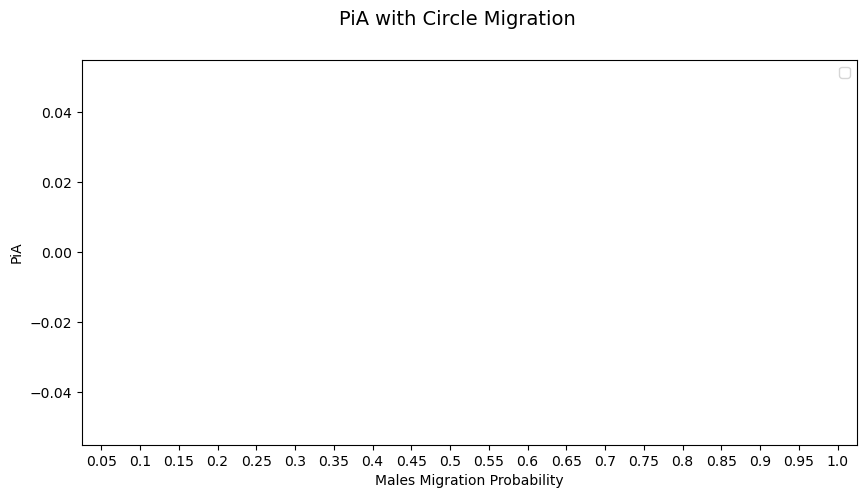

------------------------------------------------------------------------------------------------------------
Circle Migration



/tmp/ipykernel_4125713/210153399.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


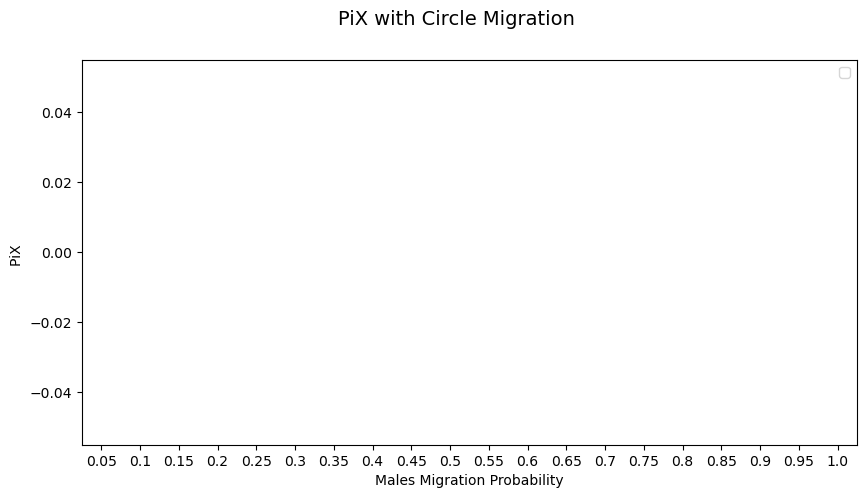

In [5]:
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWFV_MigV2_subpop/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LA_circle = [0 for k in range (len(Prob_Mig))]
LX_circle = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)

n = 10
NeA = 50
NeX = 3/4 * NeA
mu = 1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)

    X_Circle =[]
    A_Circle = []
    for NUM in range(1,501):
        File = FOLDER+"NWF_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) == 45:
                PiA = []
                PiX = []

                PiX.append(float(Values[7]))
                PiA.append(float(Values[6]))       
                A_Circle.append(np.mean(PiA))
                X_Circle.append(np.mean(PiX))
            Text.close()
    
    LA_circle[counter] = A_Circle
    LX_circle[counter] = X_Circle
    counter += 1

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("PiA with Circle Migration", fontsize=14)

ax.boxplot(LA_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("PiA")
#ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio wSubPop')
ax.legend()

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("PiX with Circle Migration", fontsize=14)

ax.boxplot(LX_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("PiX ")
#ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D', color='red',linestyle='None', markersize=5, label='Expected Ratio wSubPop')
ax.legend() 

#fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 
mp.show()